# Coverage Rates as a Function of Beta

Notebook to explore the relationship between $\beta$ and the coverage rate of resulting bivariate confidence tubes.

**Jimmy Butler, January 2025**

## Oracle Case

First, present results for an oracle case, where we know in advance the true distribution we are drawing from and so can repeatedly generate draws from it. This enables us to get the "true" $\hat{b}$ statistic via monte carlo simulations for a particular distribution, sample size, $\beta$, and isoline exceedance probability $p$. Then, we can simulate coverage very easily with this knowledge.

Although this may seem silly since if we know the distribution we are drawing from, we already know the isolines. However, this is useful to build intuition for how $\beta$ impacts coverage, and a good starting point from which we can start relaxing assumptions to the most generic cases we will face with real-world data.

In [69]:
library(dplyr)
library(ggplot2)
library(cowplot)

path <- '/pscratch/sd/j/jbbutler/oracle_analysis/'

In [79]:
# plotting functions

makeCovratePlot <- function() {
    samp_size <- 1000
    plt1 <- ggplot(data=plot_res %>% filter(n==samp_size)) + geom_point(aes(x=log_beta, y=covrate)) + geom_hline(yintercept=1-alpha, color='red') +
        theme_light() + 
        ggtitle(paste0(title_start, samp_size, ', p=', p, ', alpha=', alpha)) +
        xlab('log(beta)') +
        ylab('coverage rate') +
        ylim(y_bds) +
        theme(axis.title = element_text(size = 20), 
              axis.text = element_text(size = 20), 
              text = element_text(size = 20),
              plot.title = element_text(size=22),
              plot.margin = margin(10, 10, 10, 10))

    samp_size <- 10000
    plt2 <- ggplot(data=plot_res %>% filter(n==samp_size)) + geom_point(aes(x=log_beta, y=covrate)) + geom_hline(yintercept=1-alpha, color='red') +
        theme_light() + 
        ggtitle(paste0(title_start, samp_size, ', p=', p, ', alpha=', alpha)) +
        xlab('log(beta)') +
        ylab('coverage rate') +
        ylim(y_bds) +
        theme(axis.title = element_text(size = 20), 
              axis.text = element_text(size = 20), 
              text = element_text(size = 20),
              plot.title = element_text(size=22),
              plot.margin = margin(10, 10, 10, 10))

    samp_size <- 50000
    plt3 <- ggplot(data=plot_res %>% filter(n==samp_size)) + geom_point(aes(x=log_beta, y=covrate)) + geom_hline(yintercept=1-alpha, color='red') +
    theme_light() + 
    ggtitle(paste0(title_start, samp_size, ', p=', p, ', alpha=', alpha)) +
    xlab('log(beta)') +
    ylab('coverage rate') +
    ylim(y_bds) +
    theme(axis.title = element_text(size = 20), 
          axis.text = element_text(size = 20), 
          text = element_text(size = 20),
          plot.title = element_text(size=22),
          plot.margin = margin(10, 10, 10, 10))

plot_grid(plt1, plt2, plt3, nrow=1)
}

makeBhatPlot <- function() {

    samp_size <- 1000
    plt1 <- ggplot(data=plot_res %>% filter(n==samp_size)) + geom_point(aes(x=log_beta, y=bhat)) +
        theme_light() + 
        ggtitle(paste0(title_start, samp_size, ', p=', p, ', alpha=', alpha)) +
        xlab('log(beta)') +
        ylab('bhat') +
        theme(axis.title = element_text(size = 20), 
              axis.text = element_text(size = 20), 
              text = element_text(size = 20),
              plot.title = element_text(size=22),
              plot.margin = margin(10, 10, 10, 10))

    samp_size <- 10000
    plt2 <- ggplot(data=plot_res %>% filter(n==samp_size)) + geom_point(aes(x=log_beta, y=bhat)) +
        theme_light() + 
        ggtitle(paste0(title_start, samp_size, ', p=', p, ', alpha=', alpha)) +
        xlab('log(beta)') +
        ylab('bhat') +
        theme(axis.title = element_text(size = 20), 
              axis.text = element_text(size = 20), 
              text = element_text(size = 20),
              plot.title = element_text(size=22),
              plot.margin = margin(10, 10, 10, 10))

    samp_size <- 50000
    plt3 <- ggplot(data=plot_res %>% filter(n==samp_size)) + geom_point(aes(x=log_beta, y=bhat)) +
        theme_light() + 
        ggtitle(paste0(title_start, samp_size, ', p=', p, ', alpha=', alpha)) +
        xlab('log(beta)') +
        ylab('bhat') +
        theme(axis.title = element_text(size = 20), 
              axis.text = element_text(size = 20), 
              text = element_text(size = 20),
              plot.title = element_text(size=22),
              plot.margin = margin(10, 10, 10, 10))

plot_grid(plt1, plt2, plt3, nrow=1)
}

### Bivariate t

In [86]:
# choices to plot
alpha <- 0.01
p <- 0.1
dist <- 'bivt'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.97, 1)
title_start <- 'Bivariate t, n='

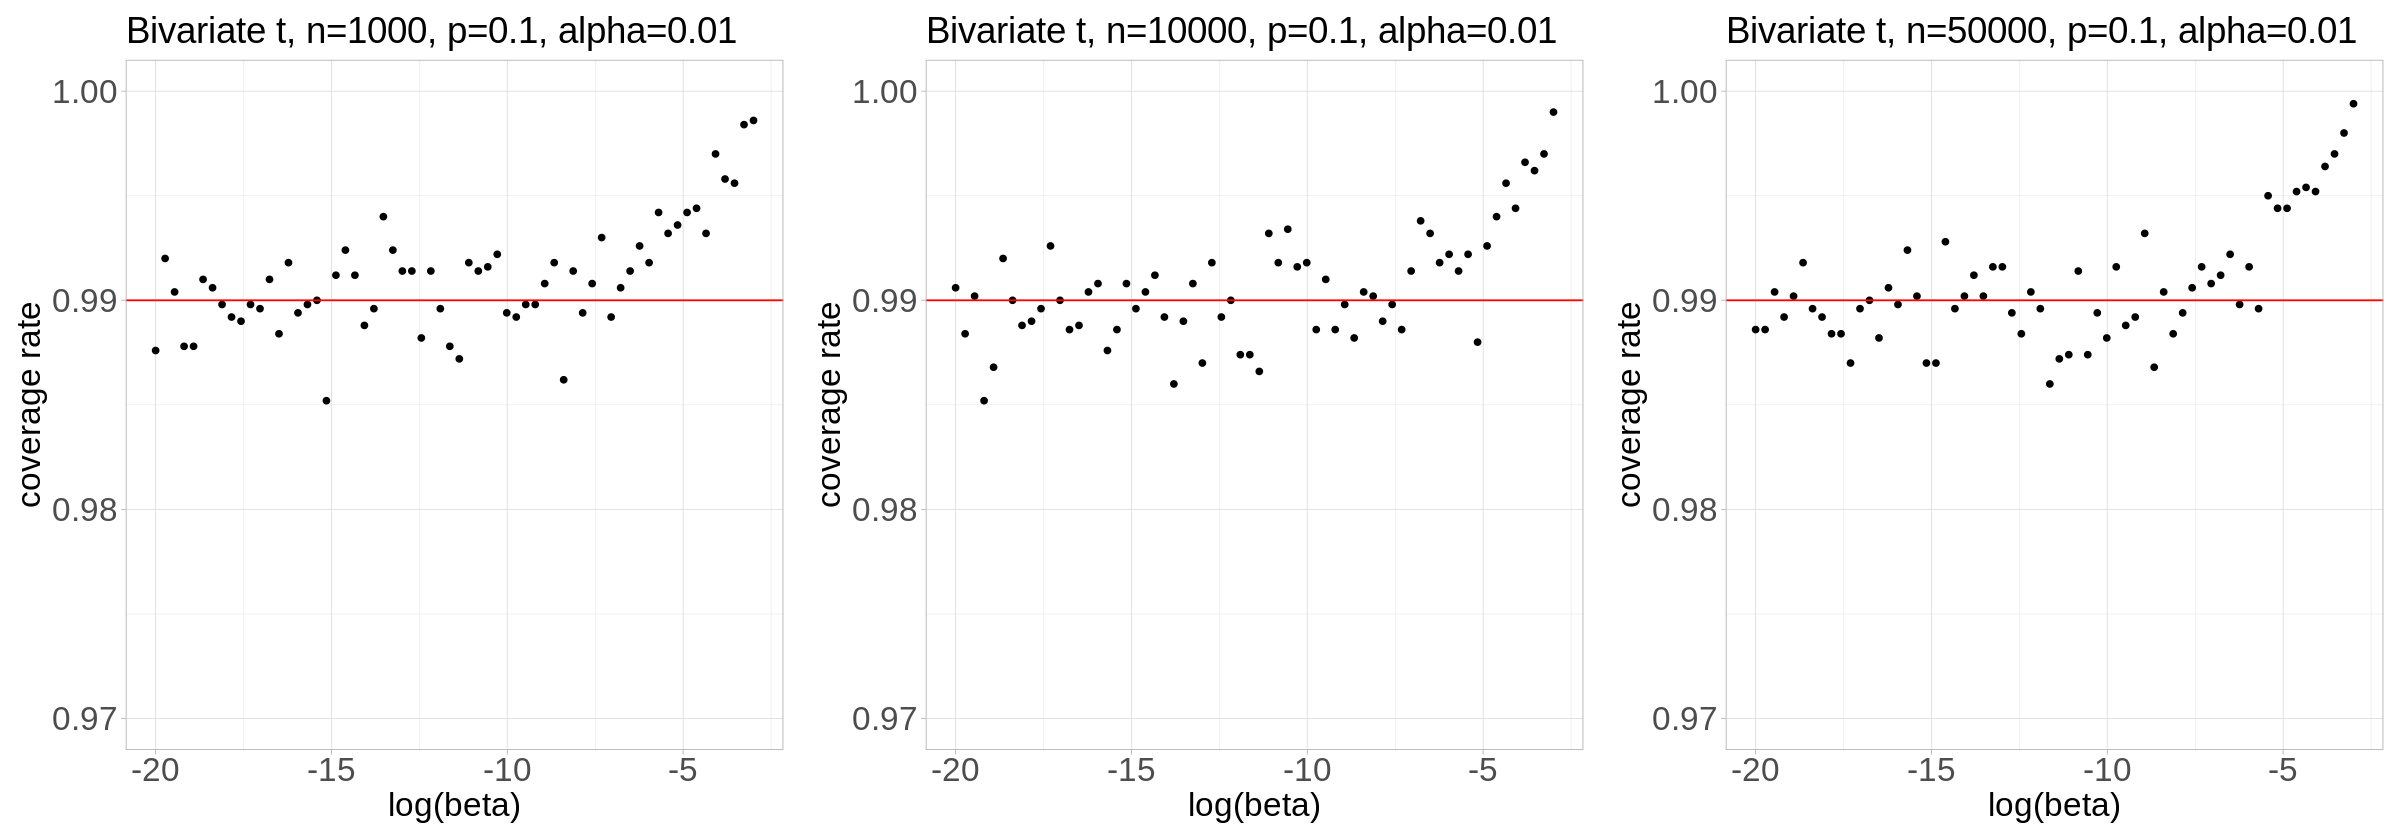

In [87]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

In [88]:
# choices to plot
alpha <- 0.05
p <- 0.1
dist <- 'bivt'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.93, 1)
title_start <- 'Bivariate t, n='

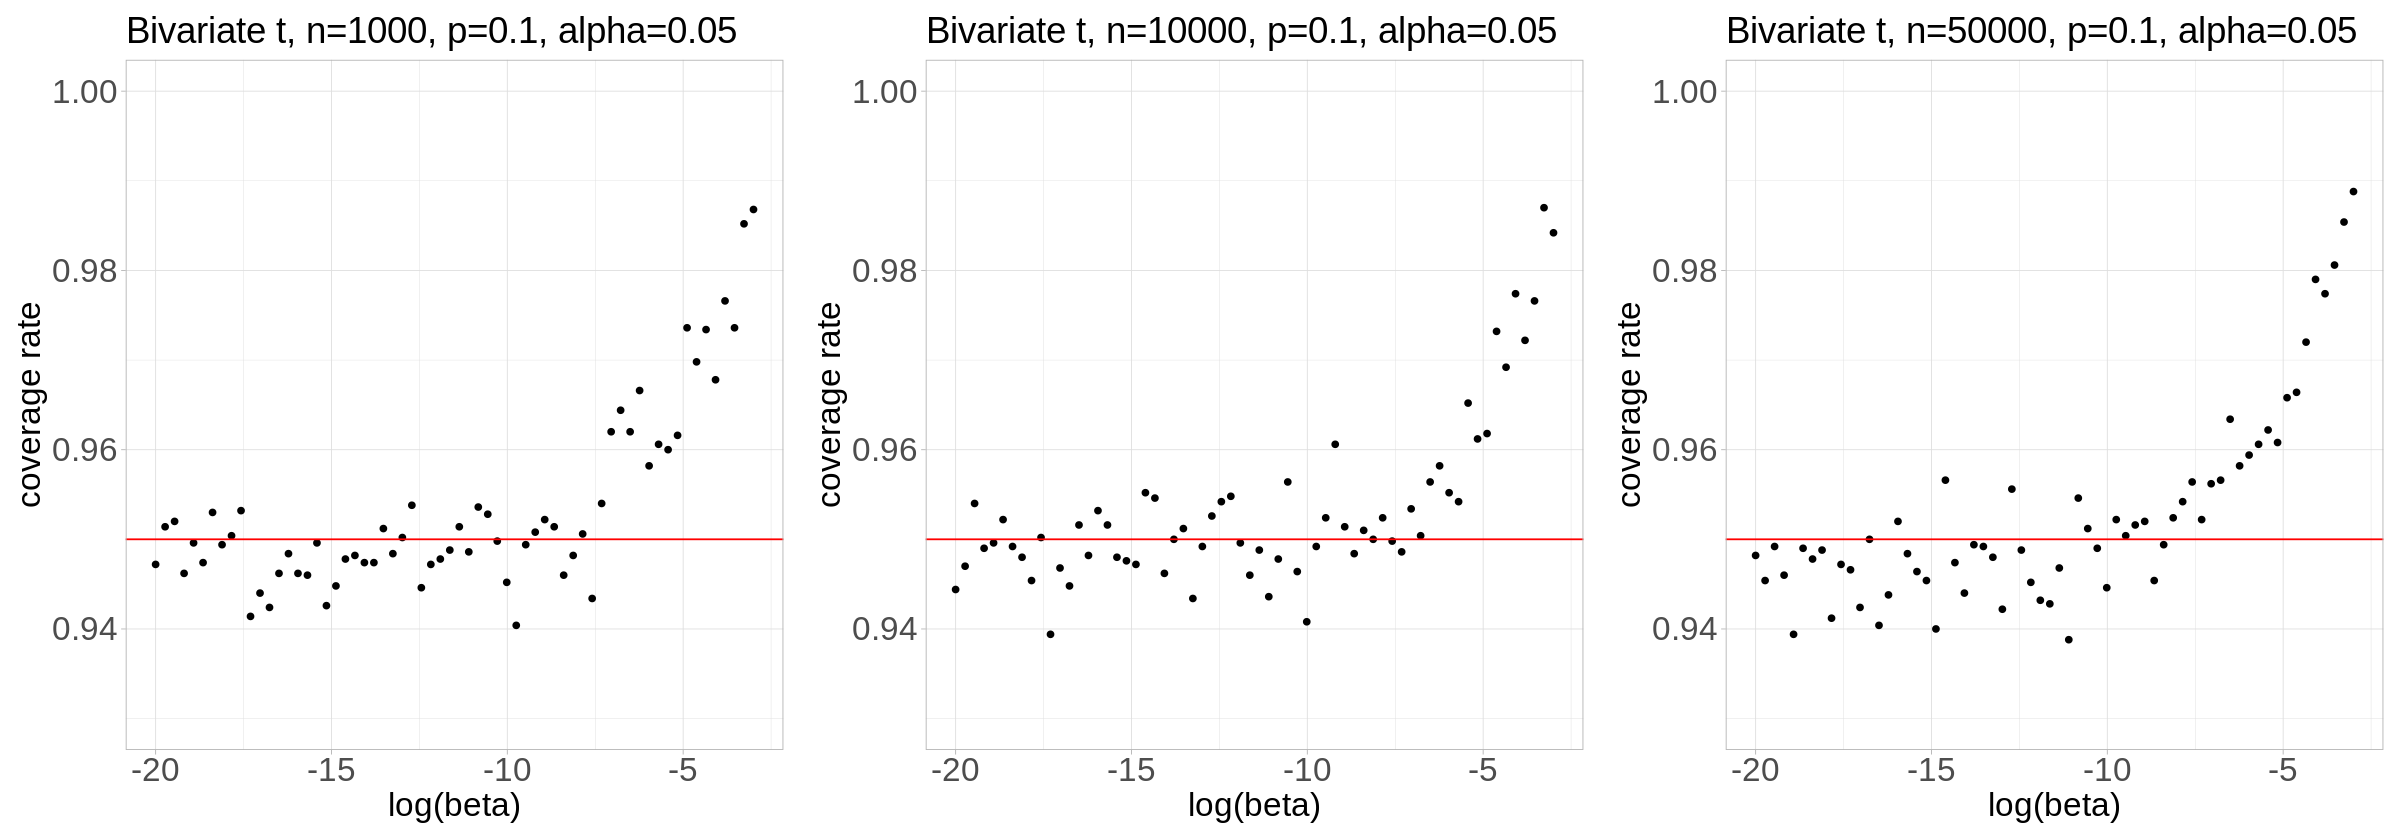

In [89]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

In [95]:
# choices to plot
alpha <- 0.1
p <- 0.1
dist <- 'bivt'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.8, 1)
title_start <- 'Bivariate t, n='

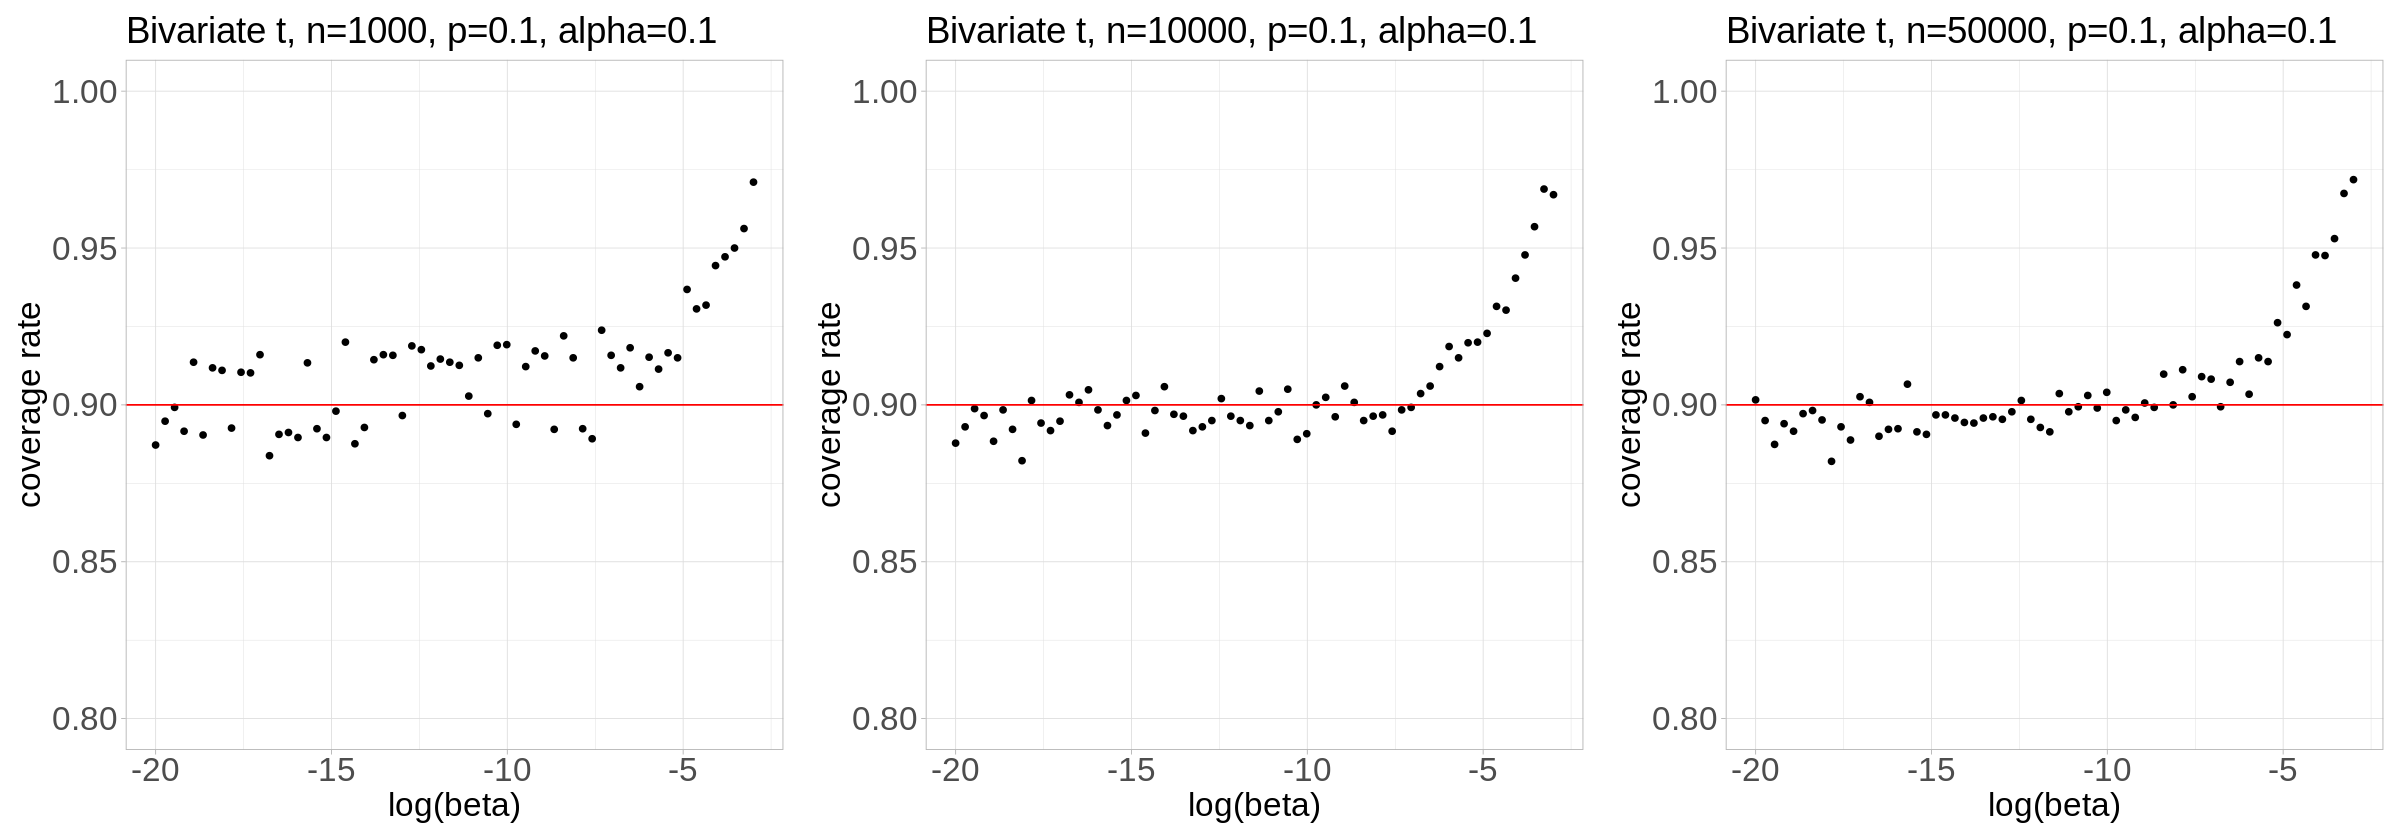

In [96]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

In [100]:
# choices to plot
alpha <- 0.01
p <- 0.01
dist <- 'bivt'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.97, 1)
title_start <- 'Bivariate t, n='

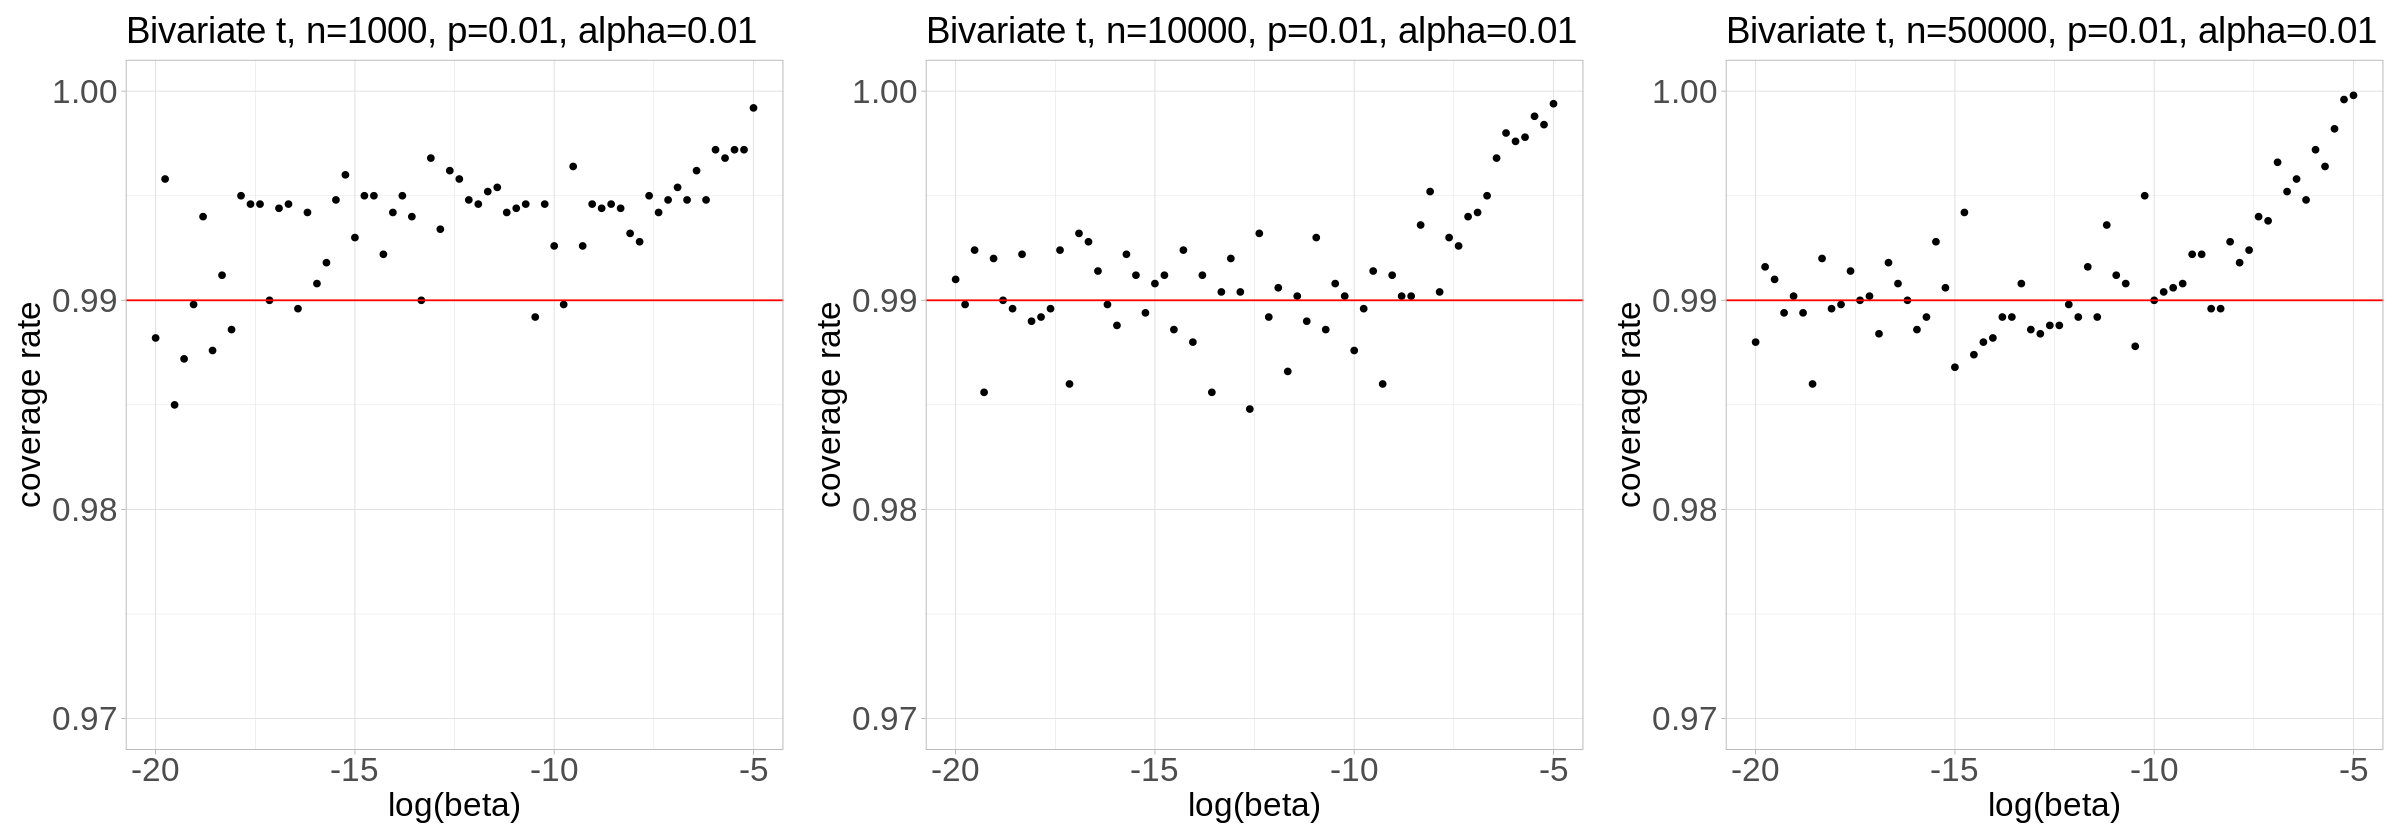

In [101]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

In [104]:
# choices to plot
alpha <- 0.05
p <- 0.01
dist <- 'bivt'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.93, 1)
title_start <- 'Bivariate t, n='

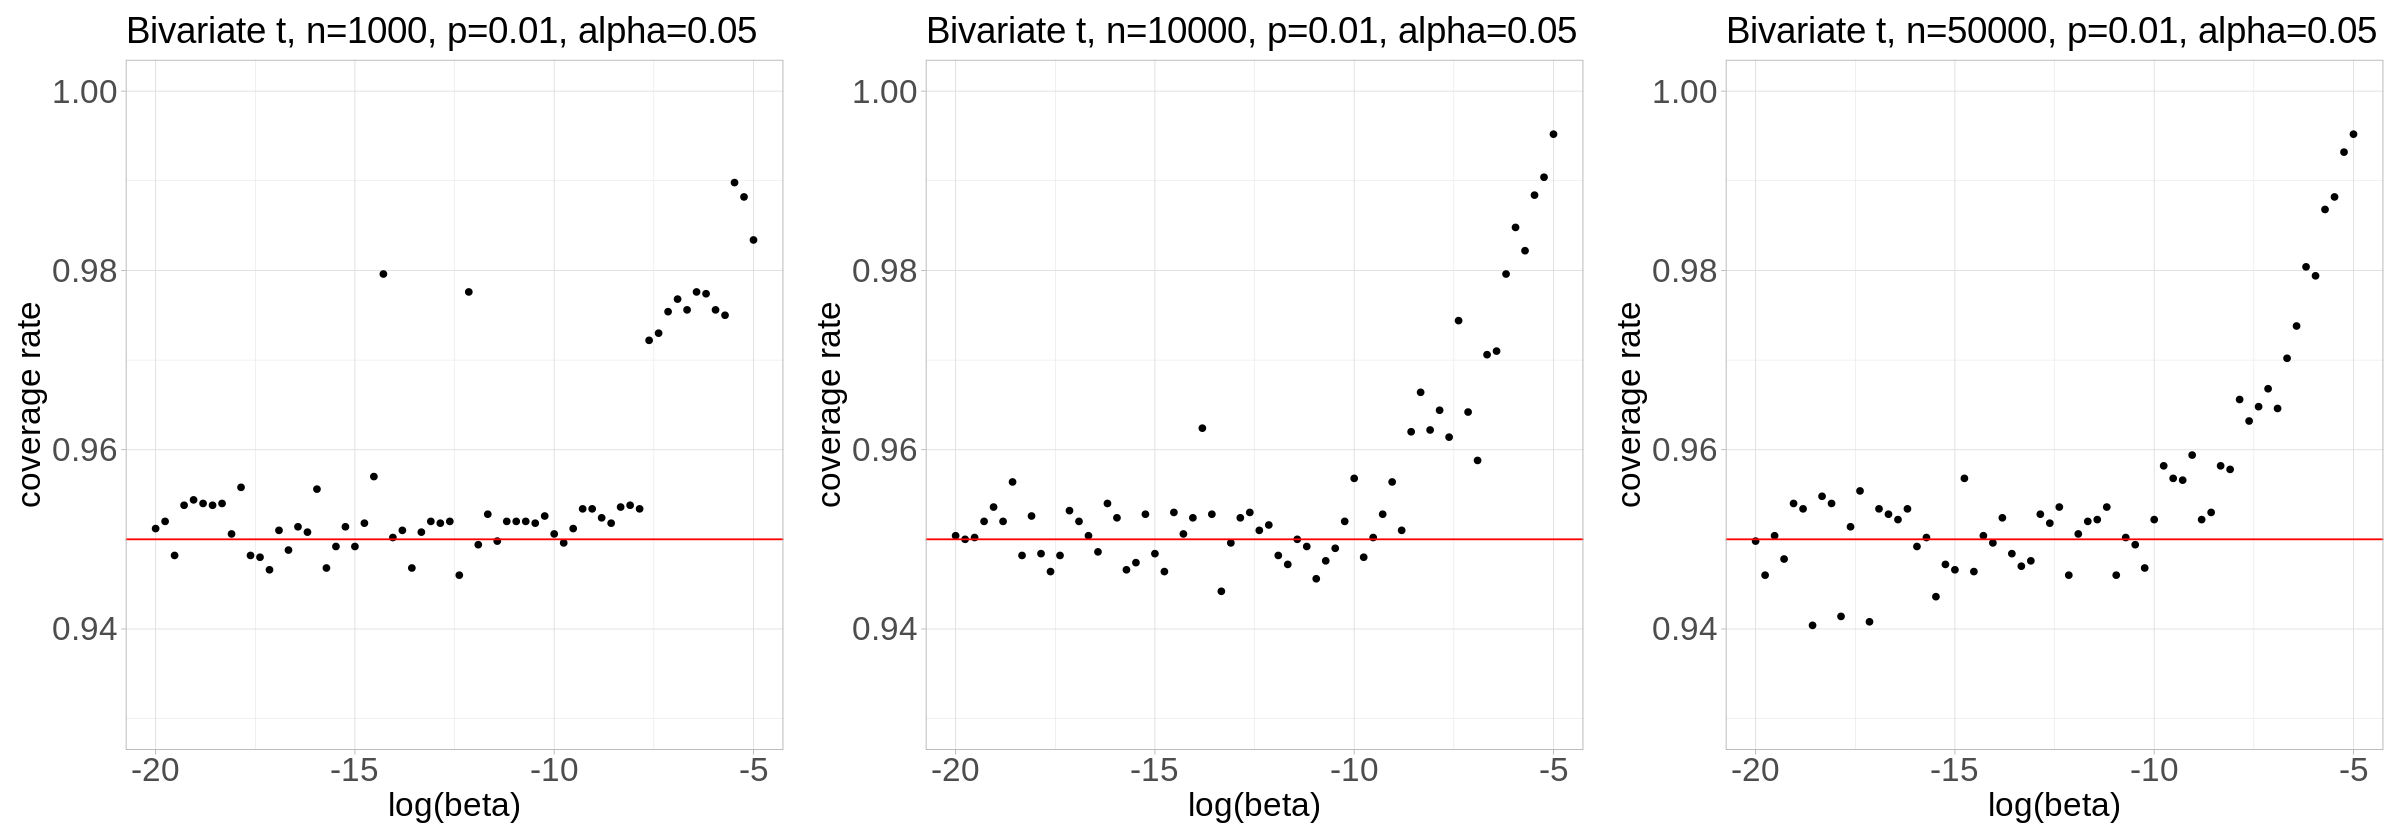

In [105]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

In [108]:
# choices to plot
alpha <- 0.1
p <- 0.01
dist <- 'bivt'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.8, 1)
title_start <- 'Bivariate t, n='

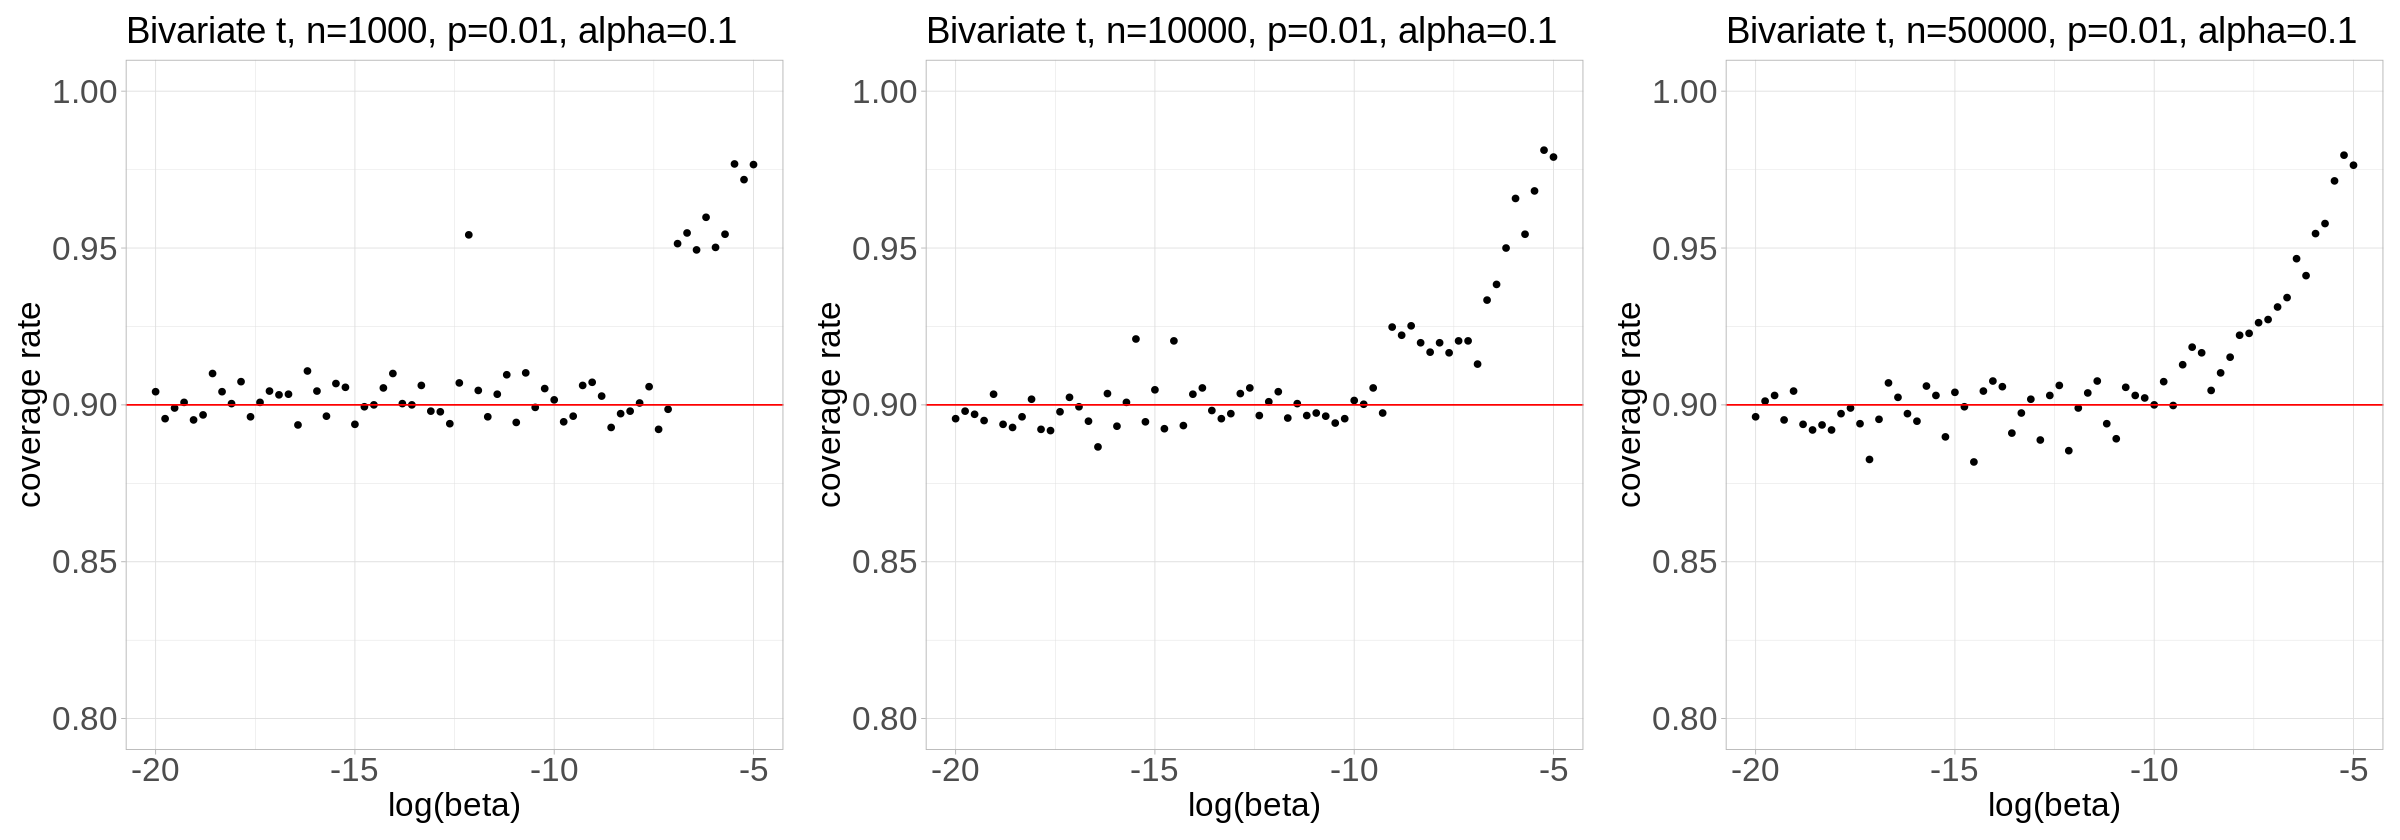

In [109]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

### Bivariate Gaussian

In [119]:
# choices to plot
alpha <- 0.01
p <- 0.1
dist <- 'bivgauss'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.97, 1)
title_start <- 'Gaussian, n='

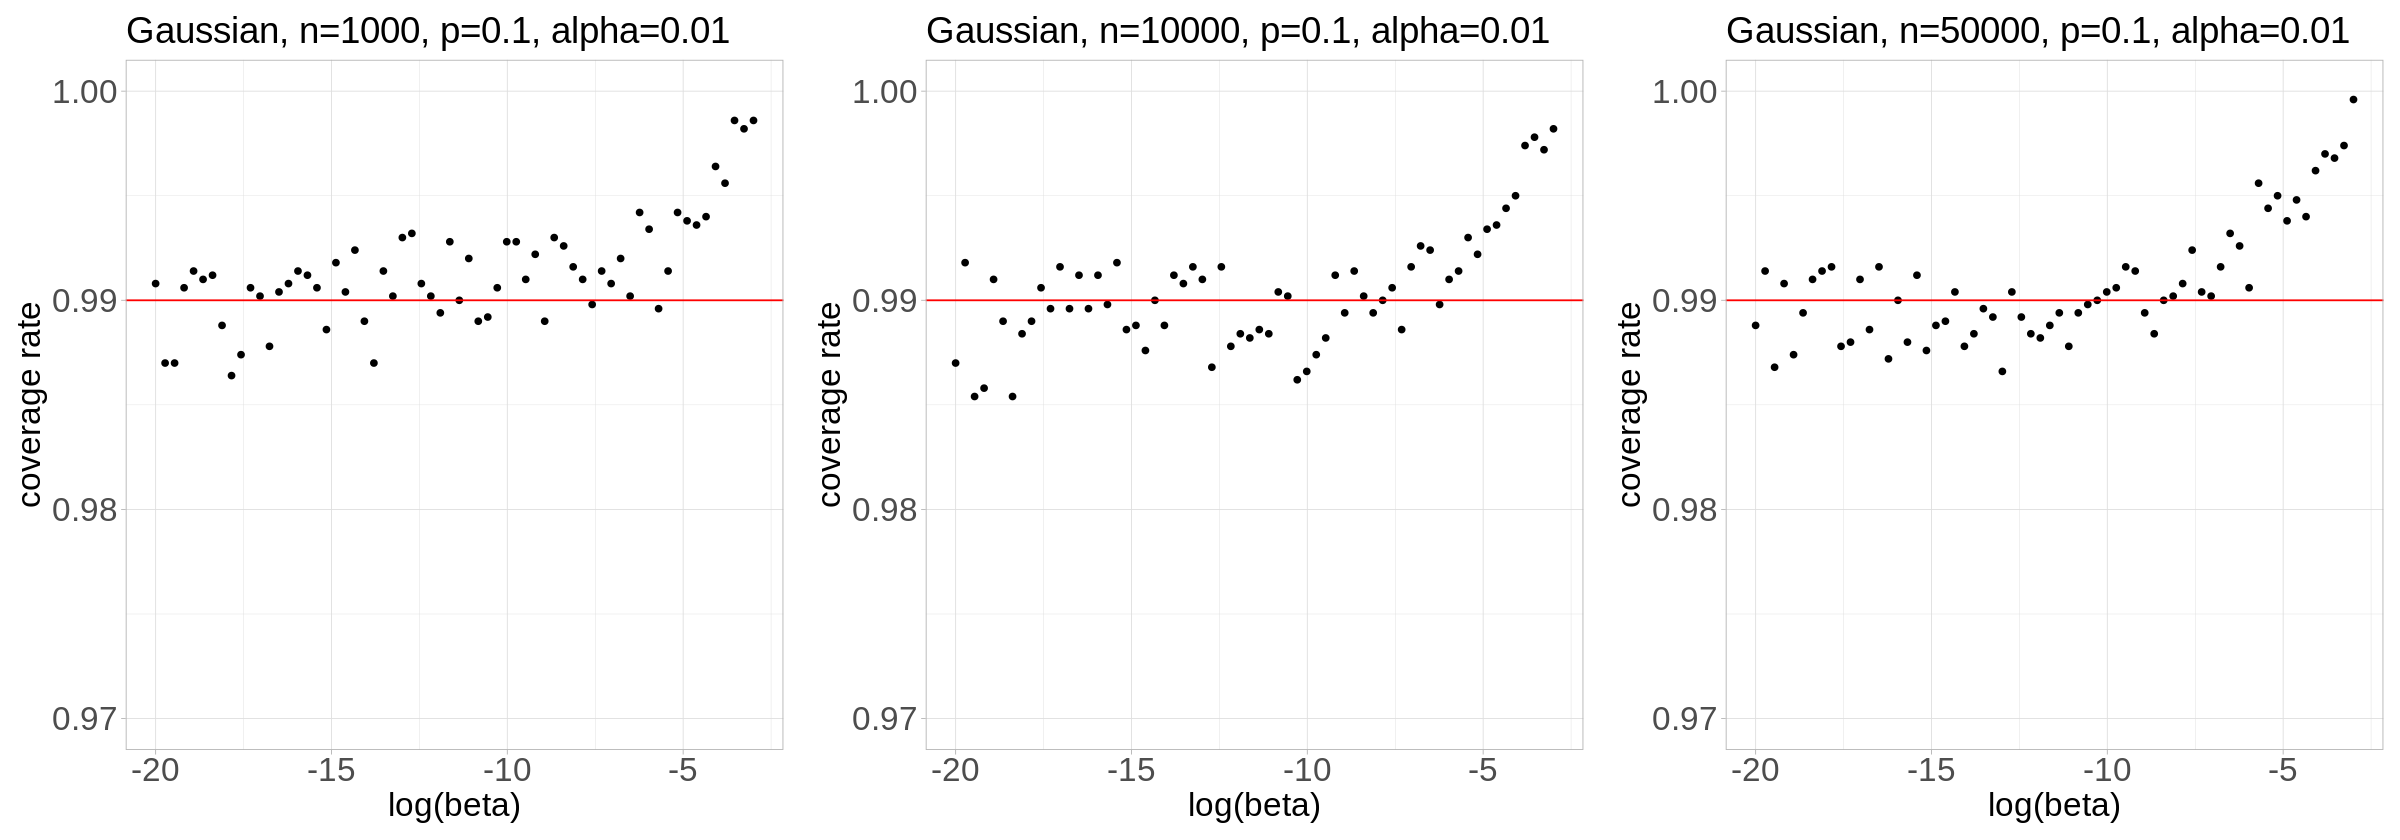

In [120]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

In [121]:
# choices to plot
alpha <- 0.05
p <- 0.1
dist <- 'bivgauss'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.93, 1)
title_start <- 'Gaussian, n='

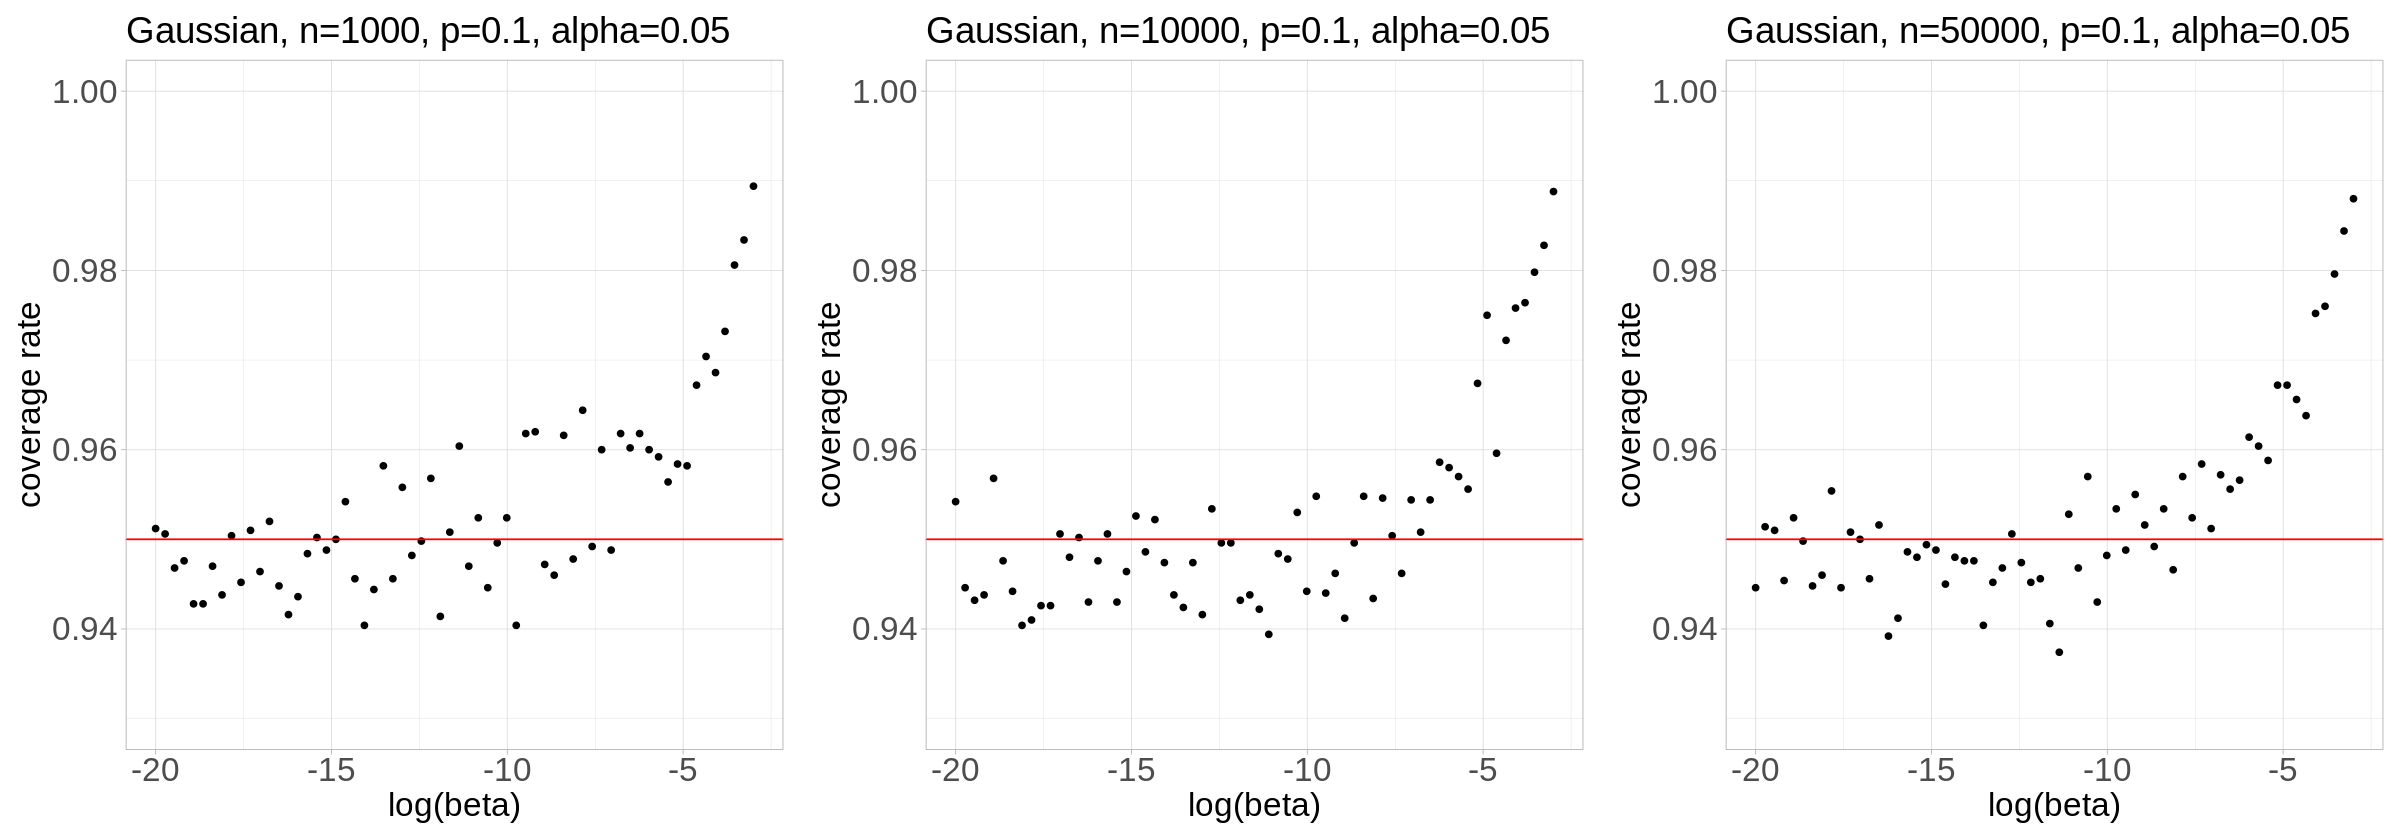

In [122]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

In [123]:
# choices to plot
alpha <- 0.1
p <- 0.1
dist <- 'bivgauss'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.8, 1)
title_start <- 'Gaussian, n='

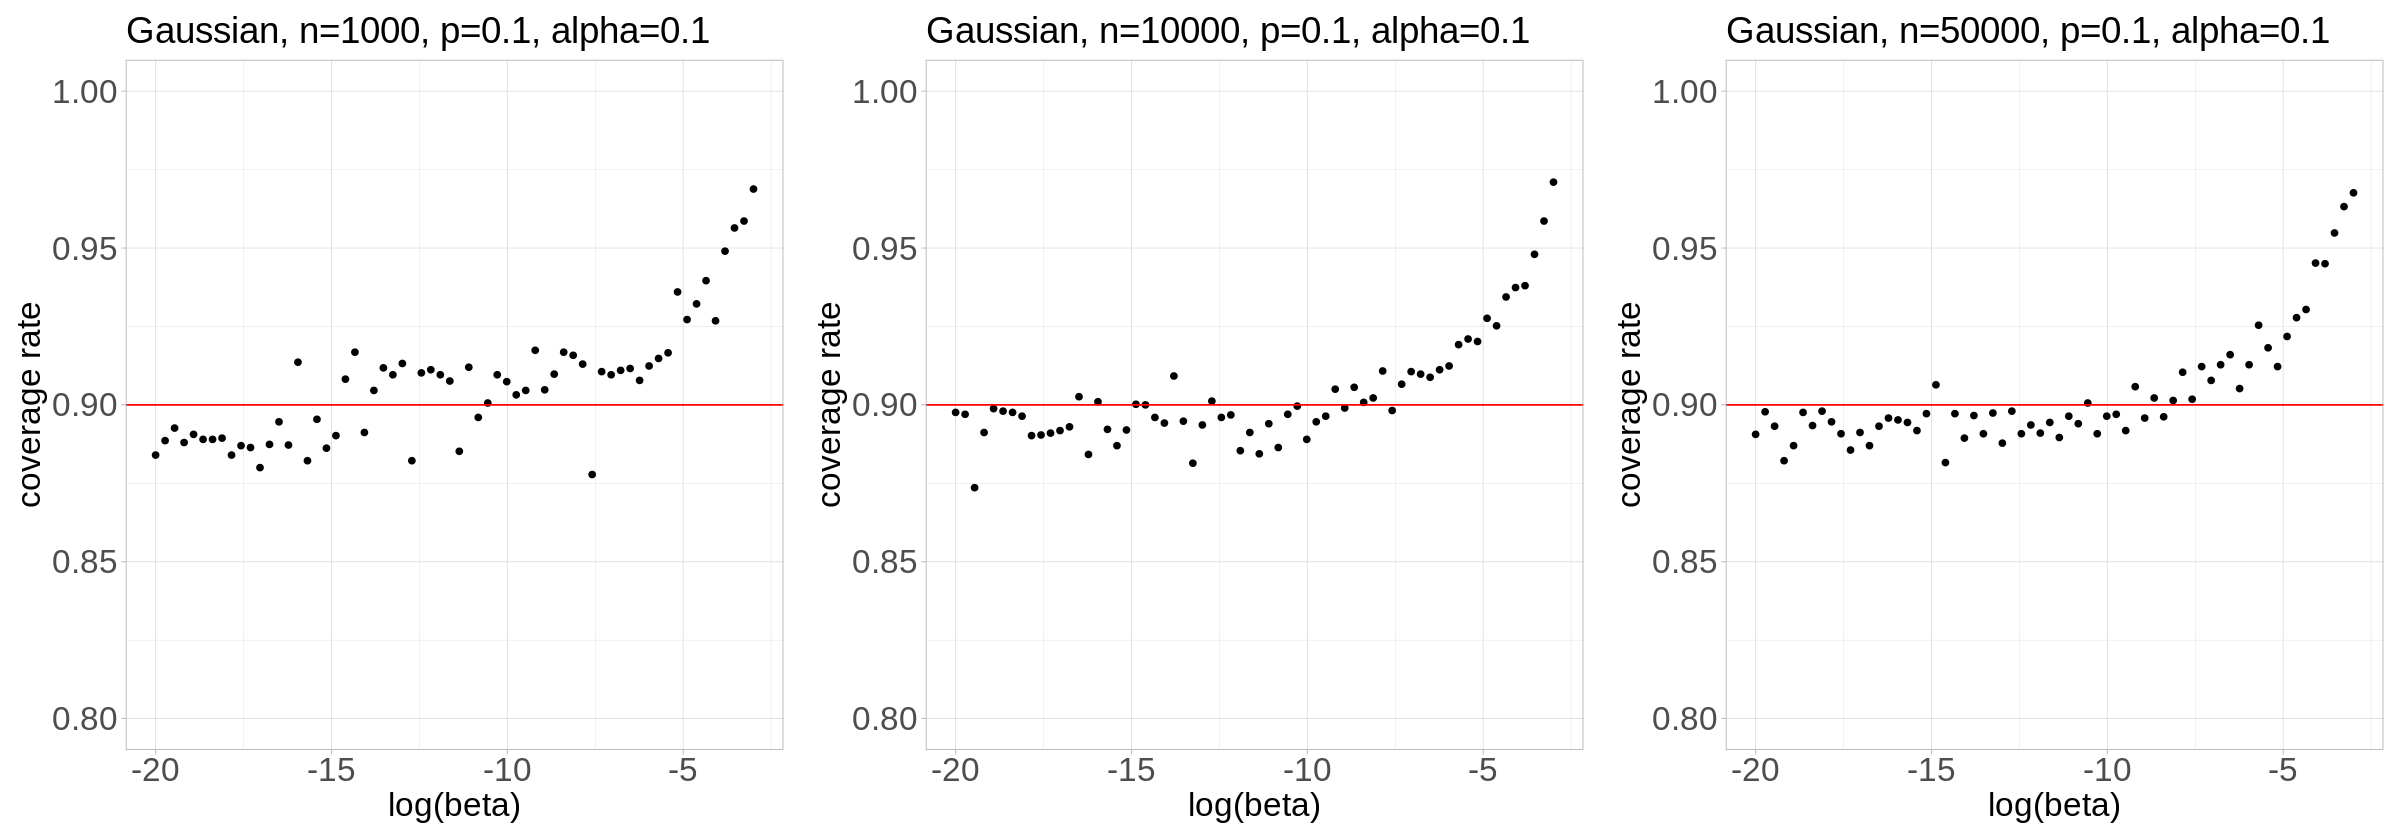

In [124]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

In [125]:
# choices to plot
alpha <- 0.01
p <- 0.01
dist <- 'bivgauss'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.97, 1)
title_start <- 'Gaussian, n='

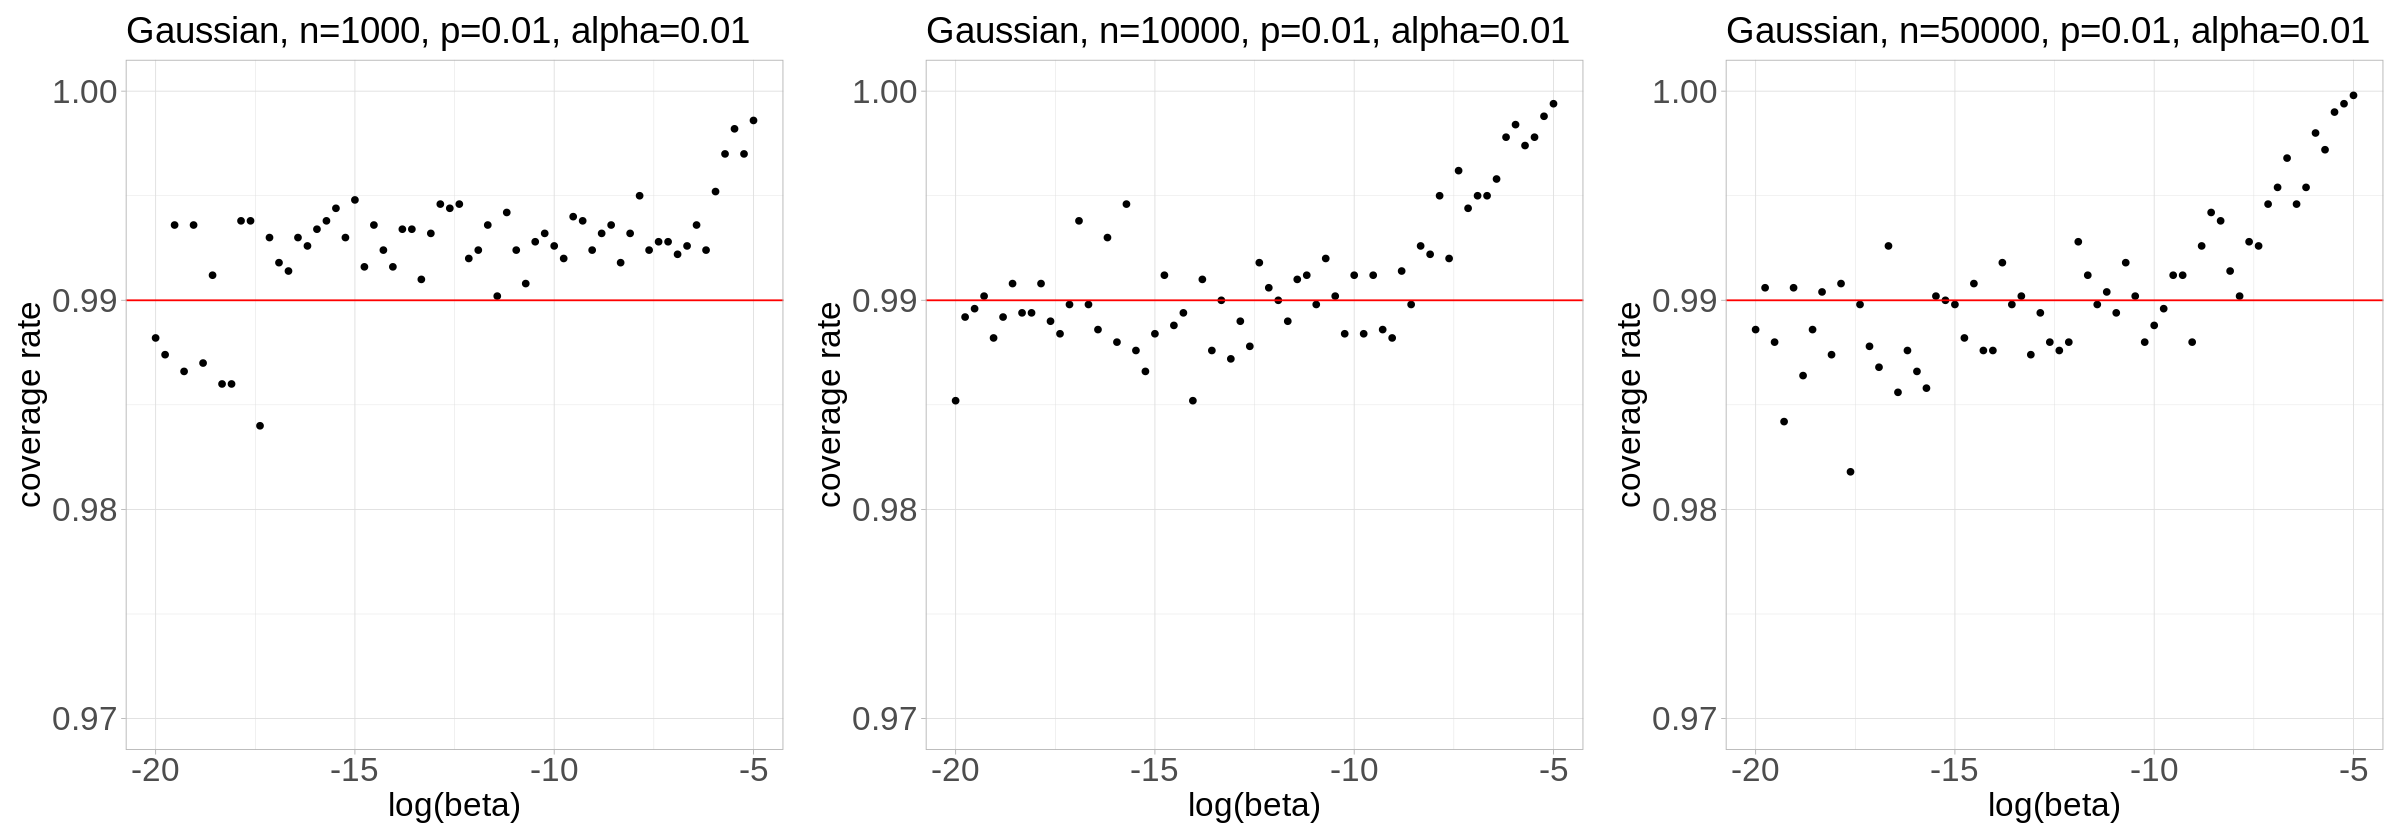

In [126]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

In [127]:
# choices to plot
alpha <- 0.05
p <- 0.01
dist <- 'bivgauss'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.93, 1)
title_start <- 'Gaussian, n='

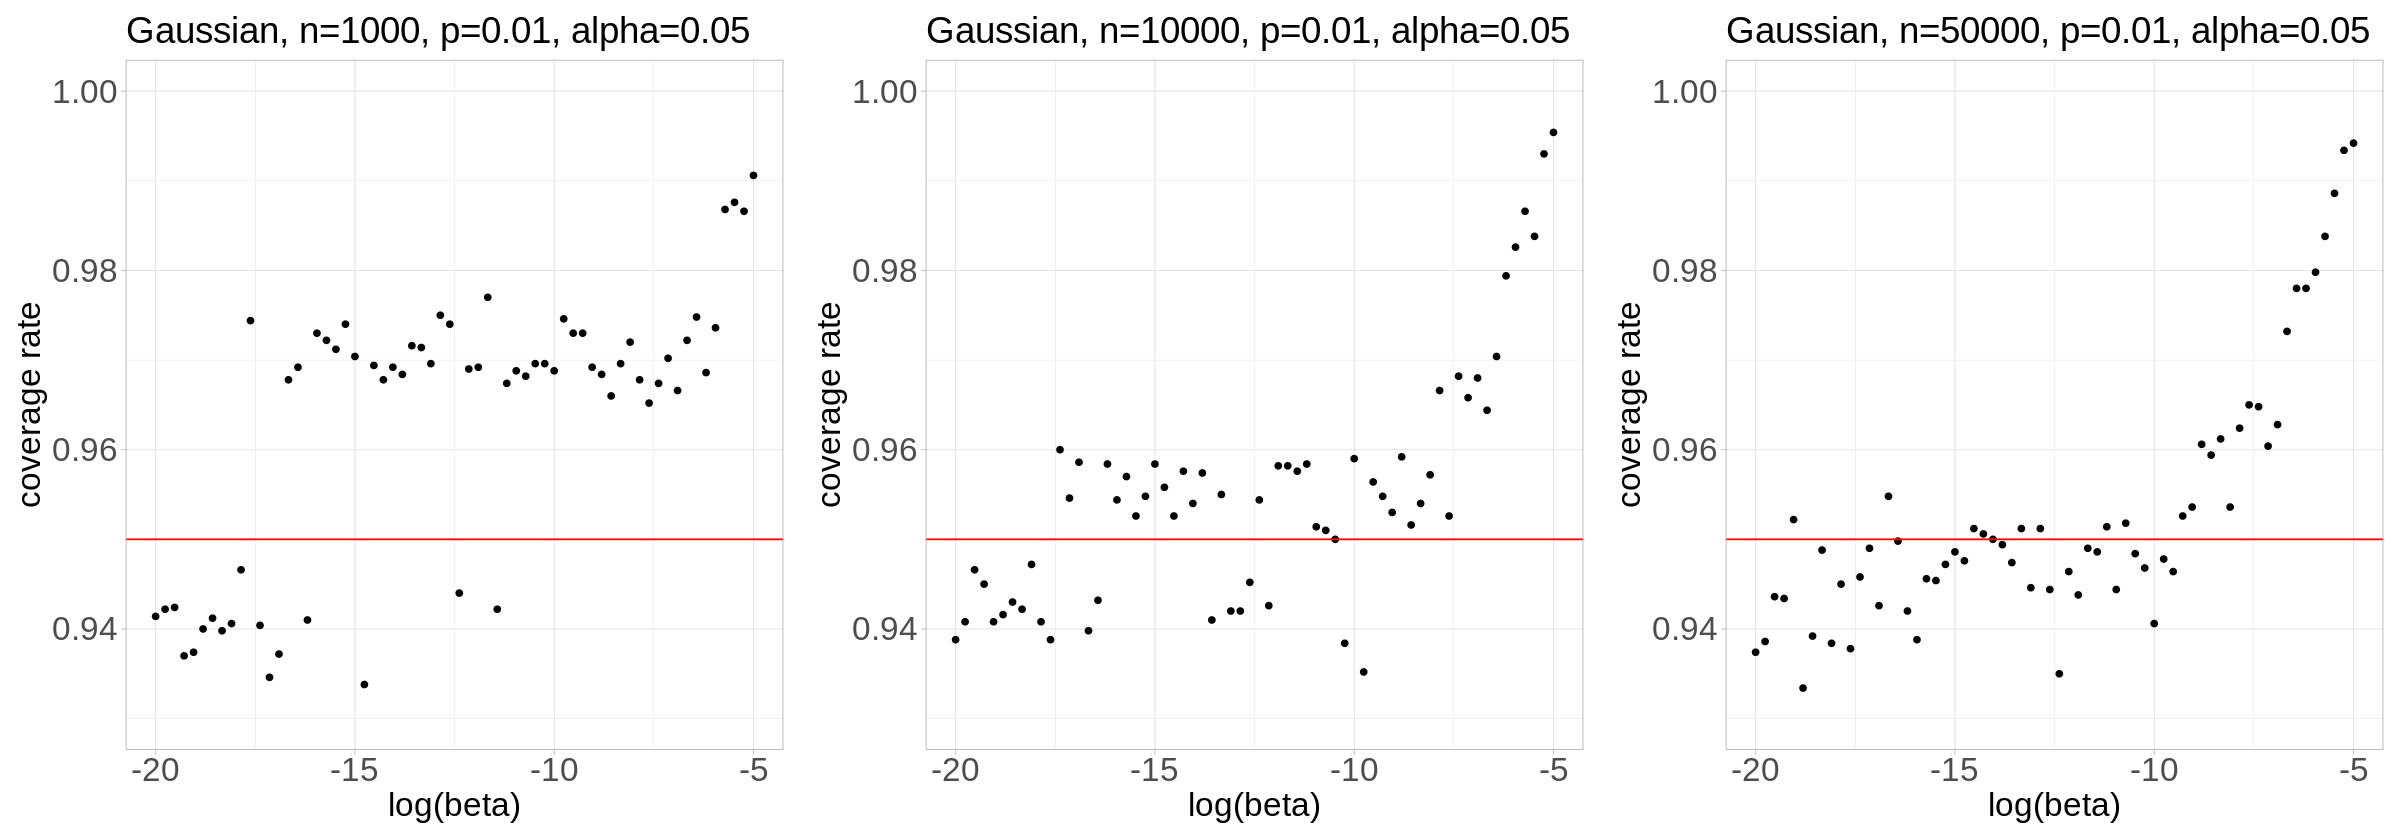

In [128]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

In [129]:
# choices to plot
alpha <- 0.1
p <- 0.01
dist <- 'bivgauss'

# loading up the tables
dist_path <- paste0(path, dist, '/covrates/p', p, '_alpha', alpha, '_n')
beta_table_50000 <- data.frame(readRDS(paste0(dist_path, '50000.RData')))
beta_table_10000 <- data.frame(readRDS(paste0(dist_path, '10000.RData')))
beta_table_1000 <- data.frame(readRDS(paste0(dist_path, '1000.RData')))

beta_table_50000$n <- as.factor(50000)
beta_table_10000$n <- as.factor(10000)
beta_table_1000$n <- as.factor(1000)

plot_res <- rbind(beta_table_50000, beta_table_10000, beta_table_1000)
plot_res$log_beta <- log(plot_res$beta)

y_bds <- c(0.8, 1)
title_start <- 'Gaussian, n='

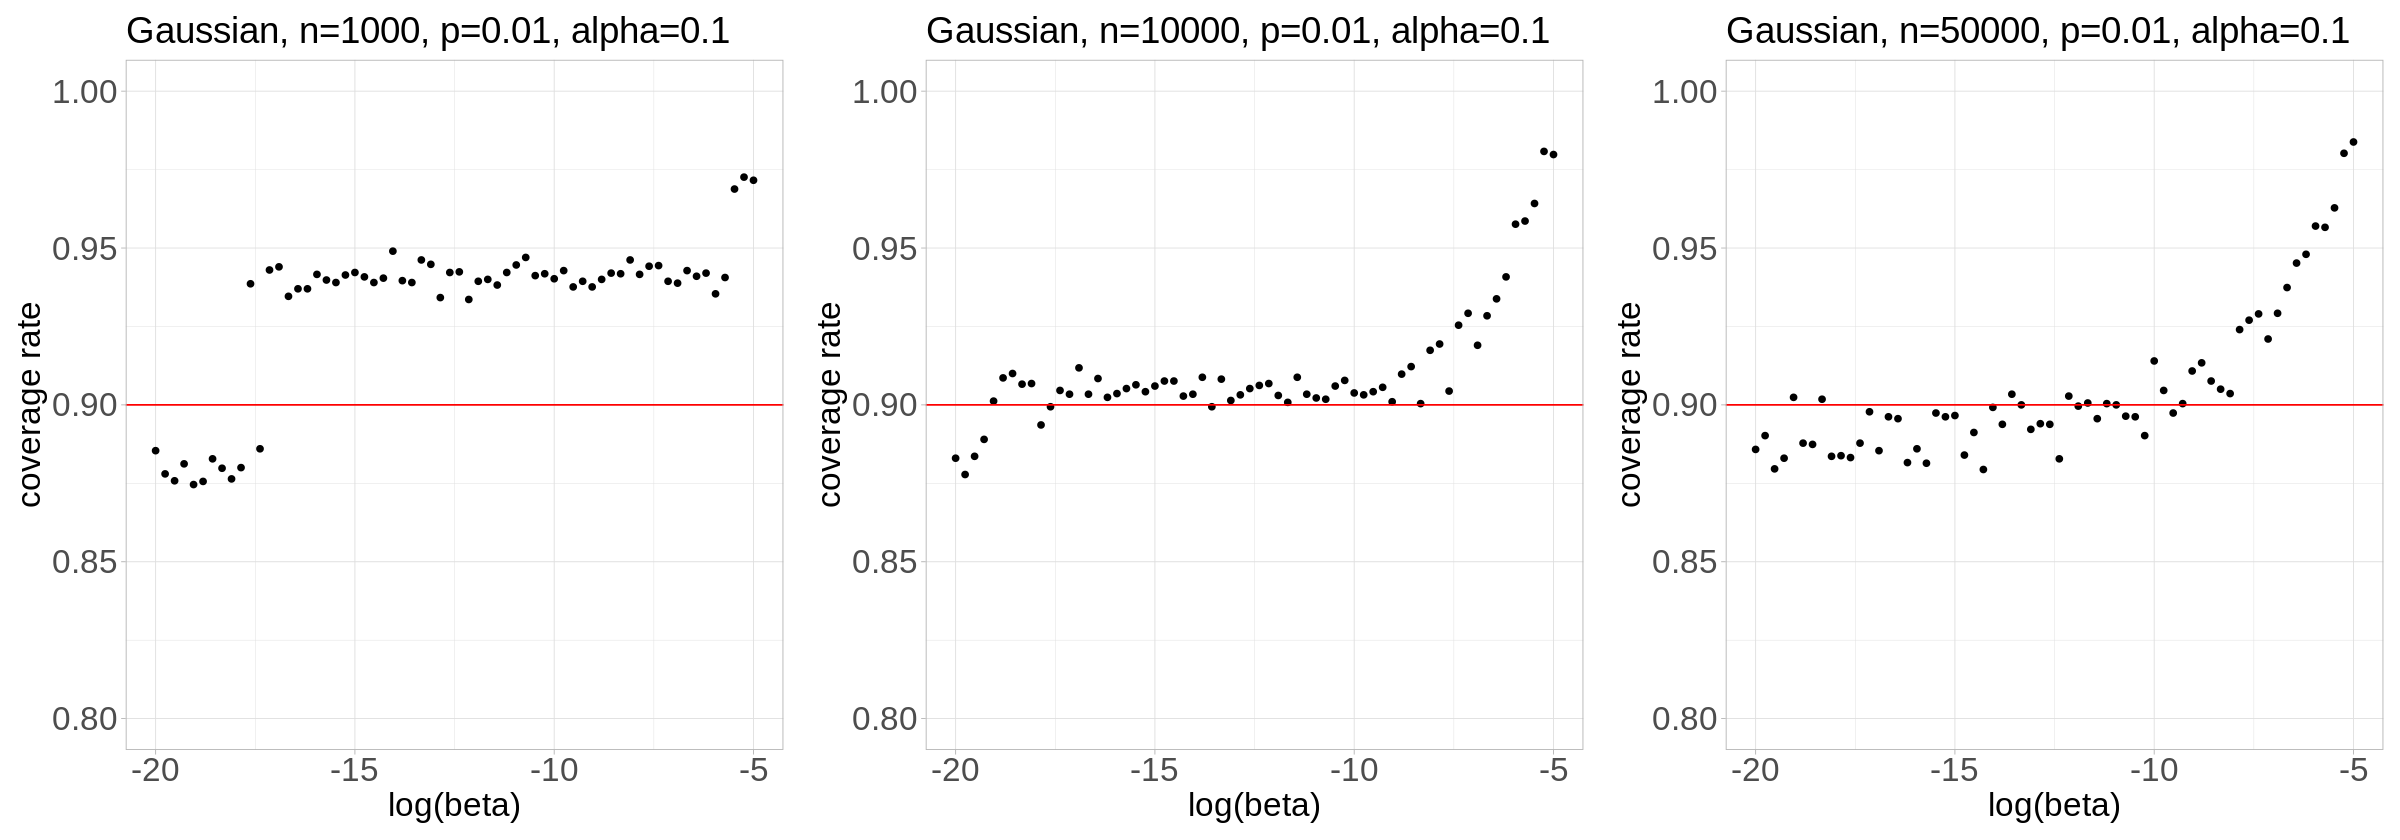

In [130]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeCovratePlot()

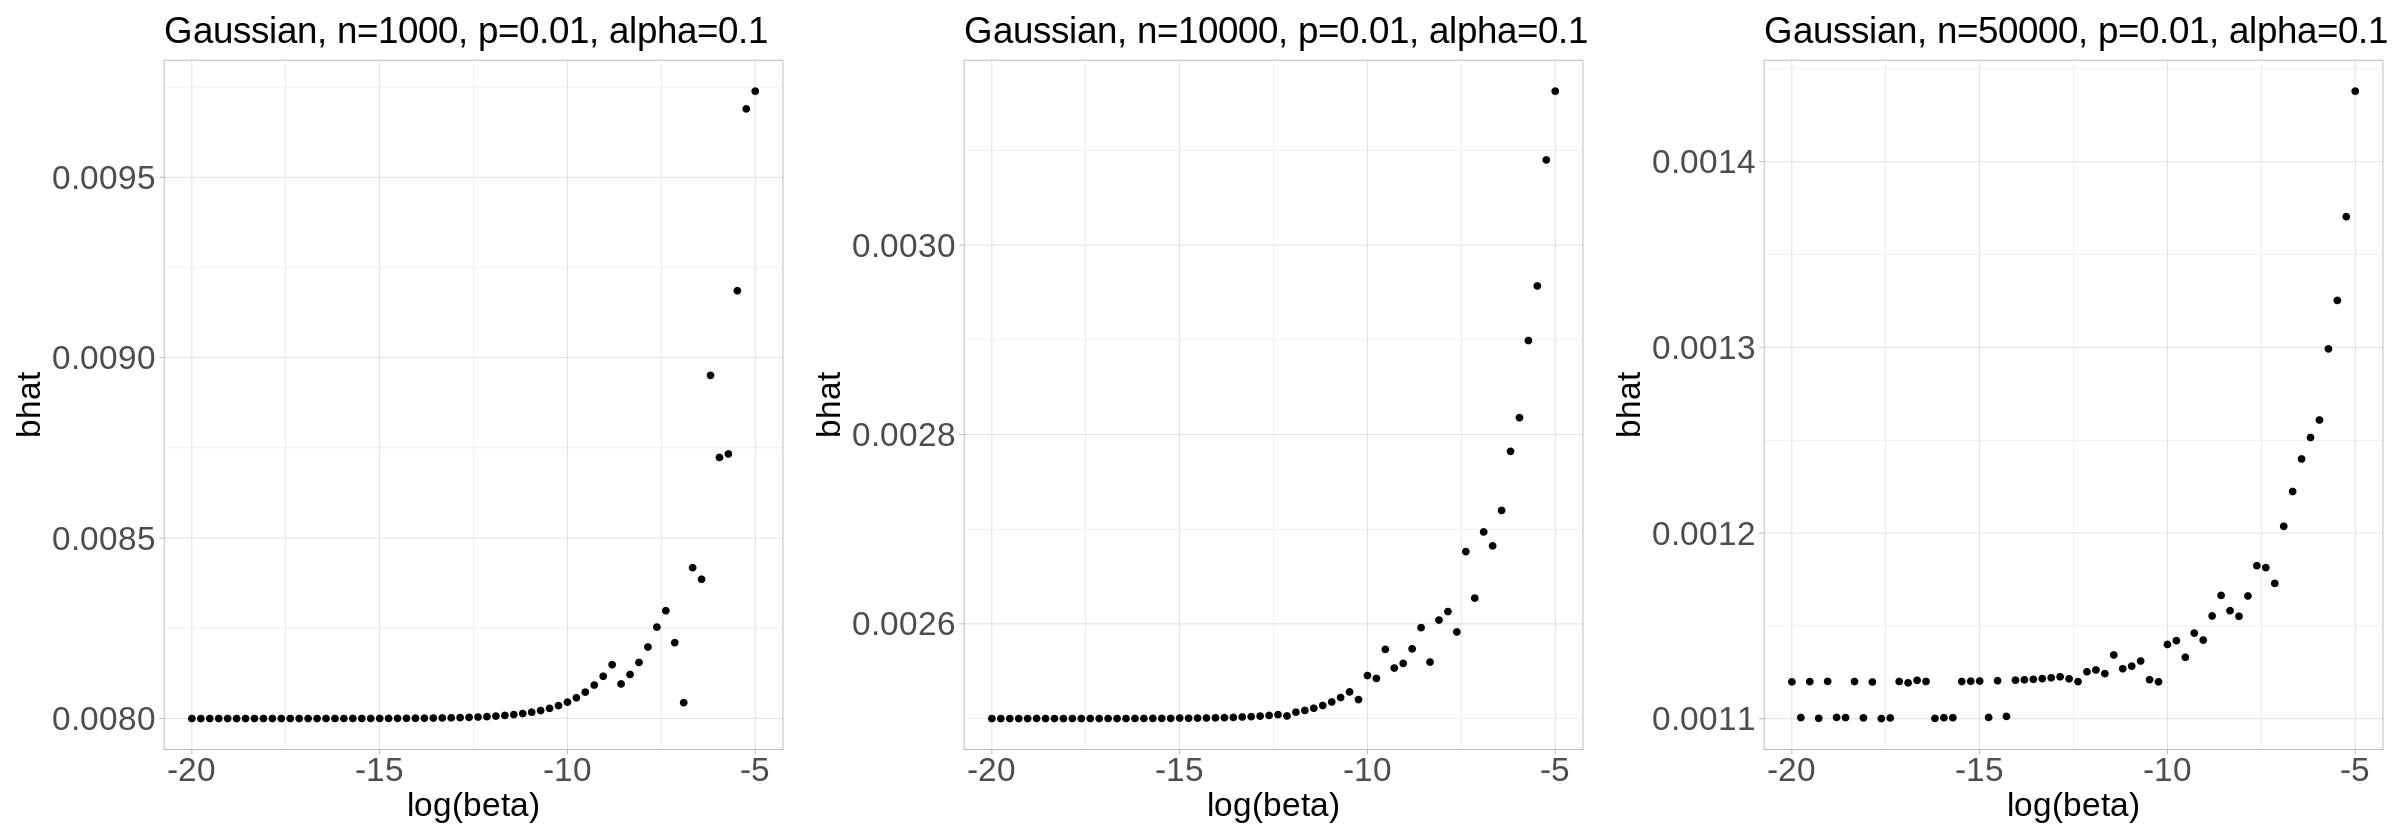

In [141]:
options(repr.plot.width=20, repr.plot.height=7, scipen=999)
makeBhatPlot()

## Non-Oracle (Real World) Case

In [168]:
res <- readRDS('/pscratch/sd/j/jbbutler/non_oracle_analysis/bivt/p0.1_alpha0.05_n10000.RData')
betas <- res$betas[rep(1:length(res$betas), each = 128)]
bhats <- do.call(c, res$bhats)
plt_df <- data.frame(betas=log(betas), bhats=bhats)

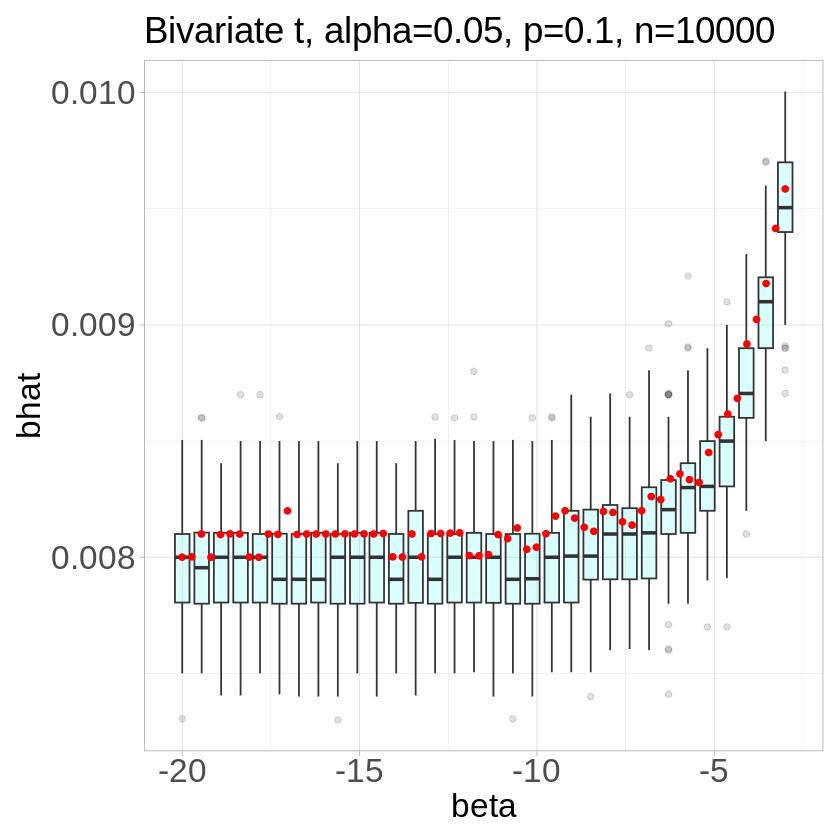

In [172]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

ggplot() + geom_boxplot(data=plt_df, aes(x=betas, y=bhats, group=betas), fill='cyan', alpha=0.15) + 
    geom_point(data=p0.1_res %>% filter(n==10000), aes(x=log_beta, y=bhat), color='red') +
    ggtitle('Bivariate t, alpha=0.05, p=0.1, n=10000') +
    xlab('beta') +
    ylab('bhat') +
    theme_light() + 
    theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      text = element_text(size = 20),
      plot.title = element_text(size=22),
      plot.margin = margin(10, 10, 10, 10))
